## Team 1 Data Analysis: S&P 500 Performance by Volume

#### We will explore the following research questions with respect to the performance of the S&P 500 stocks, divided into quintiles by monthly volume from 2015-2018:
#### 1. How did the stocks in each quintile perform over the 4-year period? Did any of the quintiles consistently outperform the others, or did the performance vary from year to year?
#### 2. What were the risks associated with investing in each of the quintiles? Did any quintile have a higher level of risk than the others?


In [1]:
# Bring in the libraries for the analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the csv file into a dataframe.
spx_volume = pd.read_csv('spx500_monthly_data_vol.csv')

# Filter the data to only include years 2015-2018.
spx_volume = spx_volume[(spx_volume['date'] >= '2015-01-01') & (spx_volume['date'] <= '2018-12-31')]

In [2]:
# View the dataframe.
spx_volume

,date,ticker,close_adj,volume
132333,2015-01-31,A,35.292151,3054313
132334,2015-01-31,AAL,46.496564,18473105
132335,2015-01-31,AAP,148.641415,830486
132336,2015-01-31,AAPL,26.289776,83745461
132337,2015-01-31,ABBV,42.910798,17582302
...,...,...,...,...
155442,2018-12-31,YUM,85.220287,1657022
155443,2018-12-31,ZBH,97.736352,1389692
155444,2018-12-31,ZBRA,159.230000,409064
155445,2018-12-31,ZION,35.926747,2575557


In [3]:
# Create a new dataframe and change the format of the close prices to a percent.
monthly_vol = spx_volume
monthly_vol["close_adj"] = spx_volume["close_adj"].pct_change()

# View the dataframe.
monthly_vol

,date,ticker,close_adj,volume
132333,2015-01-31,A,NaN,3054313
132334,2015-01-31,AAL,0.317476,18473105
132335,2015-01-31,AAP,2.196826,830486
132336,2015-01-31,AAPL,-0.823133,83745461
132337,2015-01-31,ABBV,0.632224,17582302
...,...,...,...,...
155442,2018-12-31,YUM,0.344526,1657022
155443,2018-12-31,ZBH,0.146867,1389692
155444,2018-12-31,ZBRA,0.629179,409064
155445,2018-12-31,ZION,-0.774372,2575557


In [4]:
# Change the name of the column for clarity.
monthly_vol.rename(columns={"close_adj" : "pct_chg"}, inplace=True)

# View the dataframe.
monthly_vol

,date,ticker,pct_chg,volume
132333,2015-01-31,A,NaN,3054313
132334,2015-01-31,AAL,0.317476,18473105
132335,2015-01-31,AAP,2.196826,830486
132336,2015-01-31,AAPL,-0.823133,83745461
132337,2015-01-31,ABBV,0.632224,17582302
...,...,...,...,...
155442,2018-12-31,YUM,0.344526,1657022
155443,2018-12-31,ZBH,0.146867,1389692
155444,2018-12-31,ZBRA,0.629179,409064
155445,2018-12-31,ZION,-0.774372,2575557


In [5]:
# Divide the stocks that comprise the S&P 500 into five groups (quintiles) based on volume.
monthly_vol["quintile"] = pd.qcut(monthly_vol["volume"], q = 5, labels=[1, 2, 3, 4, 5])

# View the dataframe.
monthly_vol

,date,ticker,pct_chg,volume,quintile
132333,2015-01-31,A,NaN,3054313,4
132334,2015-01-31,AAL,0.317476,18473105,5
132335,2015-01-31,AAP,2.196826,830486,1
132336,2015-01-31,AAPL,-0.823133,83745461,5
132337,2015-01-31,ABBV,0.632224,17582302,5
...,...,...,...,...,...
155442,2018-12-31,YUM,0.344526,1657022,3
155443,2018-12-31,ZBH,0.146867,1389692,2
155444,2018-12-31,ZBRA,0.629179,409064,1
155445,2018-12-31,ZION,-0.774372,2575557,3


In [6]:
# Create separate dataframes for each of the four years that are being analyzed (2015, 2016, 2017, and 2018)
monthly_vol_2015 = monthly_vol[(monthly_vol['date'] >= '2015-01-01') & (monthly_vol['date'] <= '2015-12-31')]
monthly_vol_2016 = monthly_vol[(monthly_vol['date'] >= '2016-01-01') & (monthly_vol['date'] <= '2016-12-31')]
monthly_vol_2017 = monthly_vol[(monthly_vol['date'] >= '2017-01-01') & (monthly_vol['date'] <= '2017-12-31')]
monthly_vol_2018 = monthly_vol[(monthly_vol['date'] >= '2018-01-01') & (monthly_vol['date'] <= '2018-12-31')]

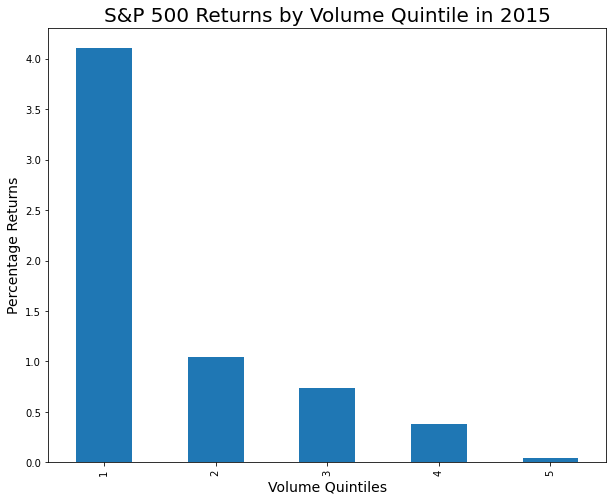

In [18]:
# Plot out the returns of each quintile over the year 2015.
plt.figure(figsize=(10,8))
monthly_vol_2015.groupby("quintile").mean()["pct_chg"].plot(kind="bar")
plt.title("S&P 500 Returns by Volume Quintile in 2015", fontsize=20)
plt.ylabel("Percentage Returns", fontsize=14)
plt.xlabel("Volume Quintiles", fontsize=14)
plt.show()

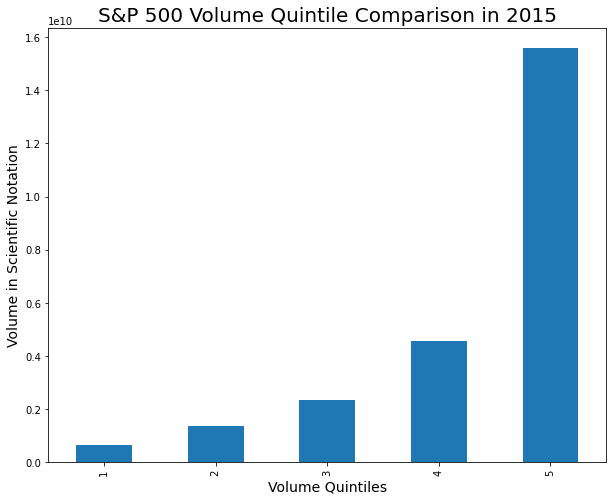

In [17]:
# Plot out the volumes of each quintile over the year 2015.
plt.figure(figsize=(10,8))
monthly_vol_2015.groupby("quintile").sum()["volume"].plot(kind="bar")
plt.title("S&P 500 Volume Quintile Comparison in 2015", fontsize=20)
plt.ylabel("Volume in Scientific Notation", fontsize=14)
plt.xlabel("Volume Quintiles", fontsize=14)
plt.show()

#### Initial analysis: the returns for 2015 appear inversely proportional to the stocks' volume.  In other words, the more volume (liquidity), the smaller the returns. What do the following years look like in terms of performance by volume? 

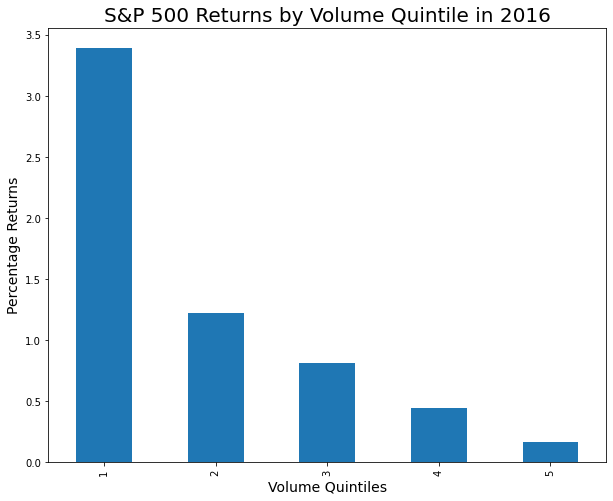

In [16]:
# Plot out the returns of each quintile over the year 2016.
plt.figure(figsize=(10,8))
monthly_vol_2016.groupby("quintile").mean()["pct_chg"].plot(kind="bar")
plt.title("S&P 500 Returns by Volume Quintile in 2016", fontsize=20)
plt.ylabel("Percentage Returns", fontsize=14)
plt.xlabel("Volume Quintiles", fontsize=14)
plt.show()

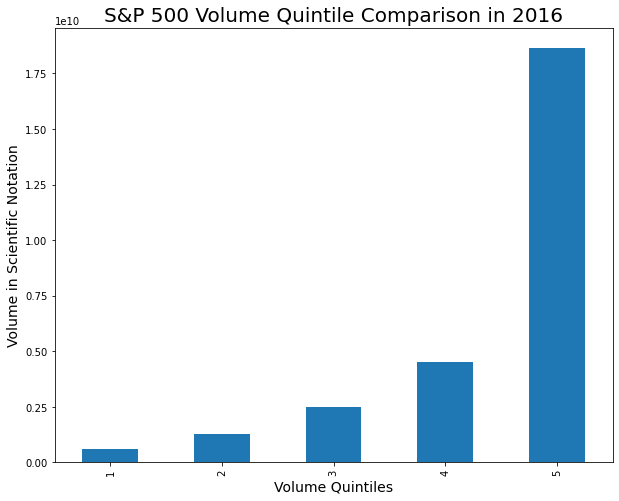

In [15]:
# Plot out the volumes of each quintile over the year 2016.
plt.figure(figsize=(10,8))
monthly_vol_2016.groupby("quintile").sum()["volume"].plot(kind="bar")
plt.title("S&P 500 Volume Quintile Comparison in 2016", fontsize=20)
plt.ylabel("Volume in Scientific Notation", fontsize=14)
plt.xlabel("Volume Quintiles", fontsize=14)
plt.show()

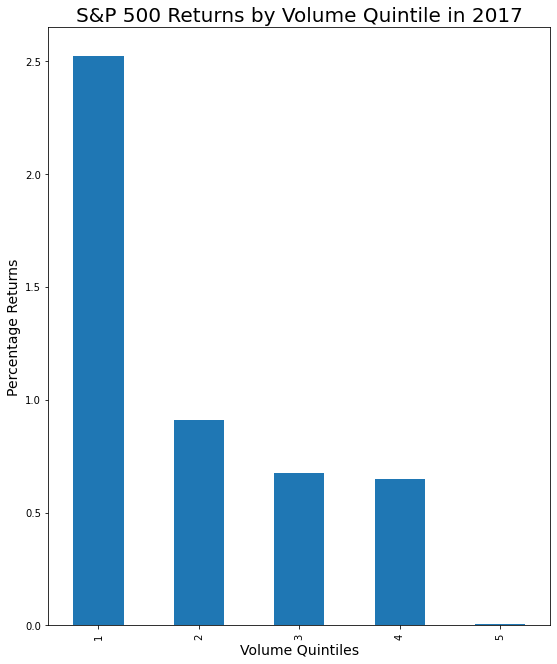

In [11]:
# Plot out the returns of each quintile over the year 2017.
plt.figure(figsize=(9,11))
monthly_vol_2017.groupby("quintile").mean()["pct_chg"].plot(kind="bar")
plt.title("S&P 500 Returns by Volume Quintile in 2017", fontsize=20)
plt.ylabel("Percentage Returns", fontsize=14)
plt.xlabel("Volume Quintiles", fontsize=14)
plt.show()

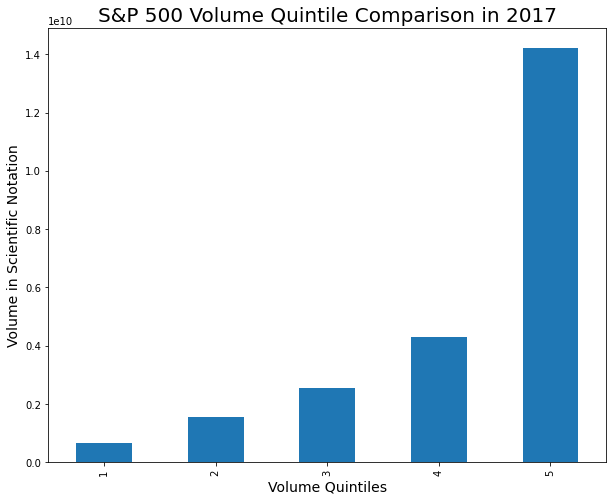

In [19]:
# Plot out the volumes of each quintile over the year 2017.
plt.figure(figsize=(10,8))
monthly_vol_2017.groupby("quintile").sum()["volume"].plot(kind="bar")
plt.title("S&P 500 Volume Quintile Comparison in 2017", fontsize=20)
plt.ylabel("Volume in Scientific Notation", fontsize=14)
plt.xlabel("Volume Quintiles", fontsize=14)
plt.show()

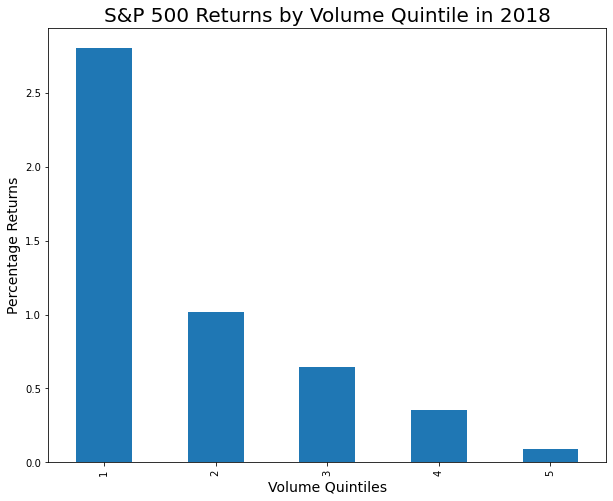

In [20]:
# Plot out the returns of each quintile over the year 2018.
plt.figure(figsize=(10,8))
monthly_vol_2018.groupby("quintile").mean()["pct_chg"].plot(kind="bar")
plt.title("S&P 500 Returns by Volume Quintile in 2018", fontsize=20)
plt.ylabel("Percentage Returns", fontsize=14)
plt.xlabel("Volume Quintiles", fontsize=14)
plt.show()

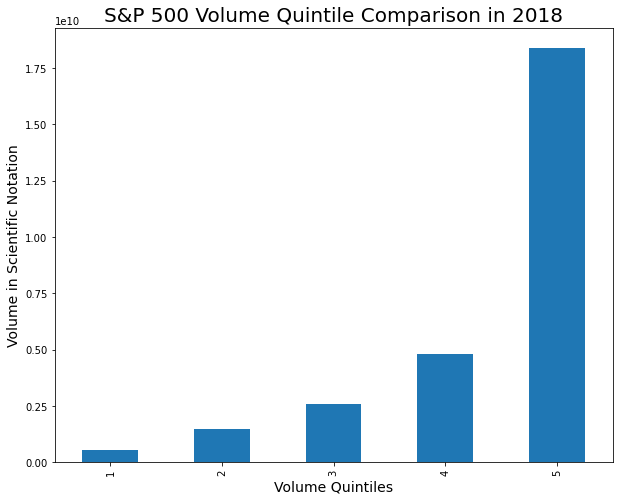

In [21]:
# Plot out the volumes of each quintile over the year 2018.
plt.figure(figsize=(10,8))
monthly_vol_2018.groupby("quintile").sum()["volume"].plot(kind="bar")
plt.title("S&P 500 Volume Quintile Comparison in 2018", fontsize=20)
plt.ylabel("Volume in Scientific Notation", fontsize=14)
plt.xlabel("Volume Quintiles", fontsize=14)
plt.show()

#### Analysis: each year demonstrates the same inverse relationship between the amount of volume each quintile represents (the overall liquidity of that set of stocks) and the amount of returns. Essentially, it appears that the market rewards the increased risk that the lower volume quintiles represent (due to lower liquidity) with greater returns.  The safer stocks, the ones that have much greater volume/liquidity, produce proportionally smaller gains.  In fact, in 2017, the largest volume quintile (5) almost produced no returns over the course of the year.  Seeing the strong relationship between the volume of the groups of stocks compared with the returns helps us understand how the market balances risk and reward.  Such an understanding can serve as a key input into developing an investment portfolio to meet specific goals around the amount of risk and potential returns desired.